Week 1 onboarding: basic tests with convolution and fft

In [155]:
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import deconvolve


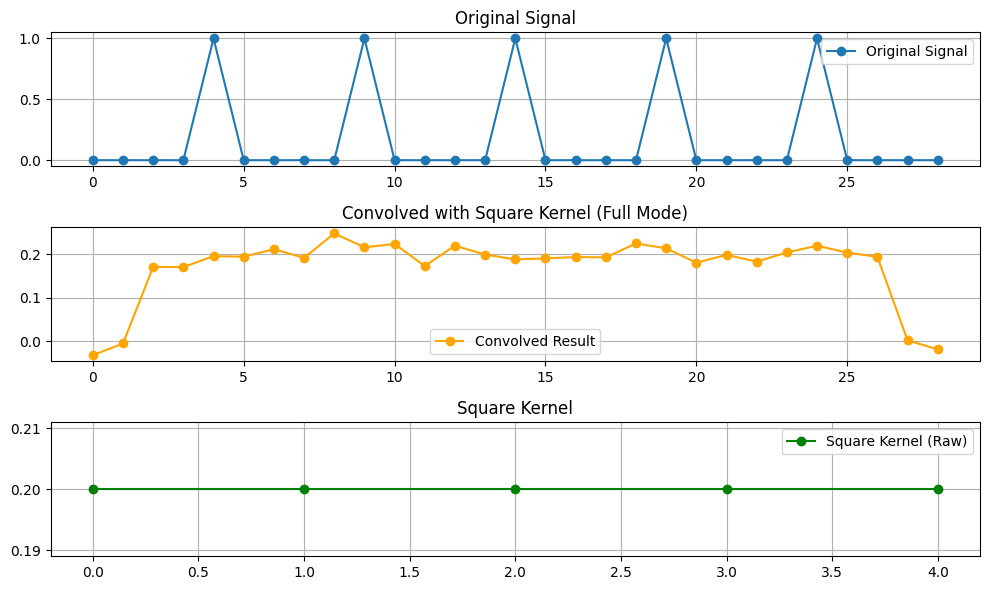

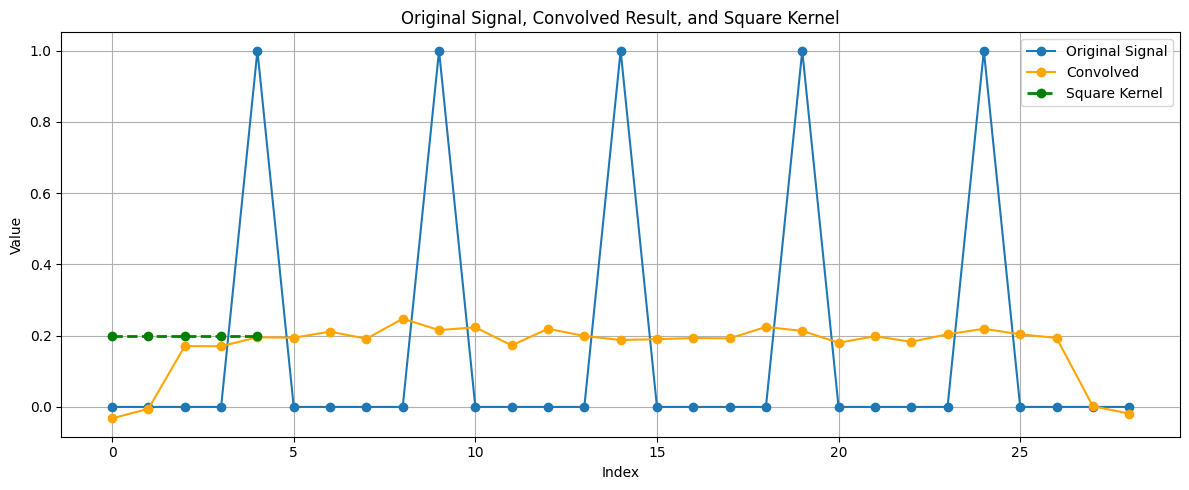

Square Kernel: [0.2 0.2 0.2 0.2 0.2]
Convolved Result: [0.  0.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.  0. ]


In [156]:

# 1 when heartbeat occurs
x = np.array([  0, 0, 0, 0, 1, 
                0, 0, 0, 0, 1, 
                0, 0, 0, 0, 1, 
                0, 0, 0, 0, 1, 
                0, 0, 0, 0, 1, 
                0, 0, 0, 0
            ])

# square wave
kernel_size = 5  # length 5
square_kernel = np.ones(kernel_size) / kernel_size  # 0.2 for all values here, square wave h
h = square_kernel  # this is our goal in long run, "can we get h" from x and y (heart beat measurements from PPG)

# when we convolve on the first value of x, we'll get:
# array: [0, 0, 0, 0, 1]
# kernel = [0.2, 0.2, 0.2, 0.2, 0.2]
# multiply: 0*0.2 + 0*0.2 + 0*0.2 + 0*0.2 + 1*0.2 = 0.2 = convolved value

# convolution
y = convolve(x, h, mode='same')  # show the extra values before we fully align the sliding window
# change to mode="same" to have the output be same size as x, centered w/ respect to full output
# change to mode="full" to get the output to be a full discrete lin combo of inputs (default)

# add noise
noise = 0.02
noisy_y = y + np.random.normal(0, noise,size=y.shape)

# plot
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

# Plot original signal
axs[0].plot(x, label="Original Signal", marker='o')
axs[0].set_title("Original Signal")
axs[0].grid(True)
axs[0].legend()

# Plot convolved result
axs[1].plot(noisy_y, label="Convolved Result", marker='o', color='orange')
axs[1].set_title("Convolved with Square Kernel (Full Mode)")
axs[1].grid(True)
axs[1].legend()

# Plot the square kernel as-is
axs[2].plot(h, label="Square Kernel (Raw)", marker='o', color='green')
axs[2].set_title("Square Kernel")
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

# plots on same graph
plt.figure(figsize=(12, 5))

# original signal
plt.plot(np.arange(len(x)), x, label="Original Signal", marker='o', linewidth=1.5)

# convolved result
plt.plot(np.arange(len(noisy_y)), noisy_y, label="Convolved", marker='o', color='orange', linewidth=1.5)

# raw kernel (plotted starting at index 0)
plt.plot(np.arange(len(h)), h, label="Square Kernel", marker='o', color='green', linewidth=2, linestyle='--')

plt.title("Original Signal, Convolved Result, and Square Kernel")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print kernel and result
print("Square Kernel:", h)
print("Convolved Result:", y)

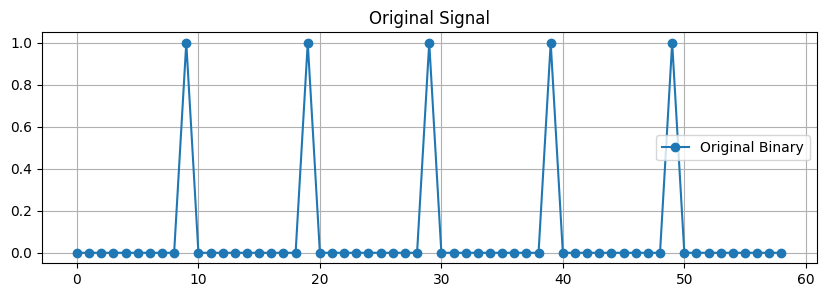

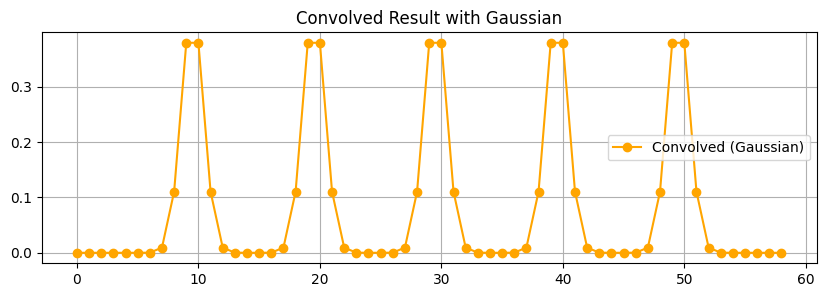

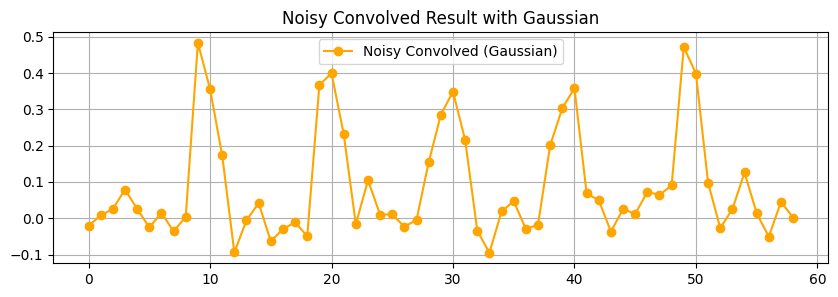

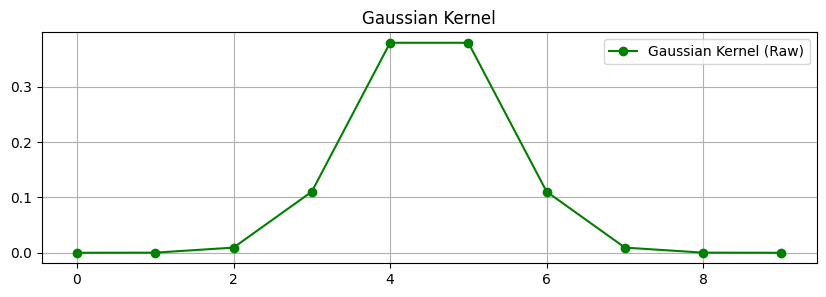

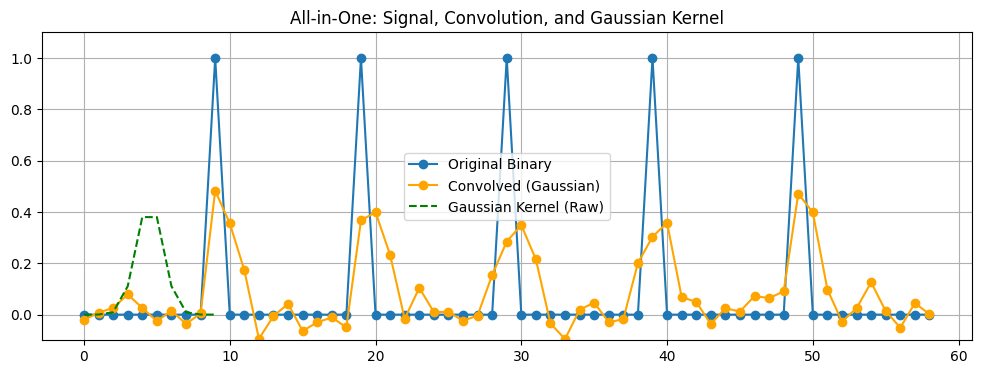

Gaussian Kernel: [1.65191096e-06 2.30489286e-04 9.35726273e-03 1.10530180e-01
 3.79880416e-01 3.79880416e-01 1.10530180e-01 9.35726273e-03
 2.30489286e-04 1.65191096e-06]
Convolved Result: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.65191096e-06 2.30489286e-04 9.35726273e-03
 1.10530180e-01 3.79880416e-01 3.79880416e-01 1.10530180e-01
 9.35726273e-03 2.30489286e-04 1.65191096e-06 1.65191096e-06
 2.30489286e-04 9.35726273e-03 1.10530180e-01 3.79880416e-01
 3.79880416e-01 1.10530180e-01 9.35726273e-03 2.30489286e-04
 1.65191096e-06 1.65191096e-06 2.30489286e-04 9.35726273e-03
 1.10530180e-01 3.79880416e-01 3.79880416e-01 1.10530180e-01
 9.35726273e-03 2.30489286e-04 1.65191096e-06 1.65191096e-06
 2.30489286e-04 9.35726273e-03 1.10530180e-01 3.79880416e-01
 3.79880416e-01 1.10530180e-01 9.35726273e-03 2.30489286e-04
 1.65191096e-06 1.65191096e-06 2.30489286e-04 9.35726273e-03
 1.10530180e-01 3.79880416e-01 3.79880416e-01 1.10530180e-01
 9.35726273e-03 2.

In [157]:
# heartbeat frequency
x_gaussian = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                         0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                         0, 0, 0, 0, 0, 0, 0, 0, 0])

# gaussian kernel
def make_gaussian(size, sigma):
    x = np.linspace(-size // 2, size // 2, size)
    gauss = np.exp(-x ** 2 / (2 * sigma ** 2))
    return gauss / gauss.sum()  # normalize

kernel_size = 10
sigma = 1
gaussian_kernel = make_gaussian(kernel_size, sigma)

# convolve
convolved_result = convolve(x_gaussian, gaussian_kernel, mode='same')

noise_gaussian = 0.05
noisy_y_gaussian = convolved_result + np.random.normal(0, noise_gaussian, size=convolved_result.shape)

# plot original signal
plt.figure(figsize=(10, 3))
plt.plot(x_gaussian, label="Original Binary", marker='o')
plt.title("Original Signal")
plt.grid(True)
plt.legend()
plt.show()

# plot convolved result
plt.figure(figsize=(10, 3))
plt.plot(convolved_result, label="Convolved (Gaussian)", marker='o', color='orange')
plt.title("Convolved Result with Gaussian")
plt.grid(True)
plt.legend()
plt.show()

# plot noisy convolved result
plt.figure(figsize=(10, 3))
plt.plot(noisy_y_gaussian, label="Noisy Convolved (Gaussian)", marker='o', color='orange')
plt.title("Noisy Convolved Result with Gaussian")
plt.grid(True)
plt.legend()
plt.show()

# plot gaussian kernel
plt.figure(figsize=(10, 3))
plt.plot(gaussian_kernel, label="Gaussian Kernel (Raw)", marker='o', color='green')
plt.title("Gaussian Kernel")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(x_gaussian, label="Original Binary", marker='o')
plt.plot(noisy_y_gaussian, label="Convolved (Gaussian)", marker='o', color='orange')
plt.plot(np.arange(len(gaussian_kernel)), gaussian_kernel, label="Gaussian Kernel (Raw)", linestyle='--', color='green')
plt.title("All-in-One: Signal, Convolution, and Gaussian Kernel")
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

# print actual values
print("Gaussian Kernel:", gaussian_kernel)
print("Convolved Result:", convolved_result)




FFT of the noisy convolutions

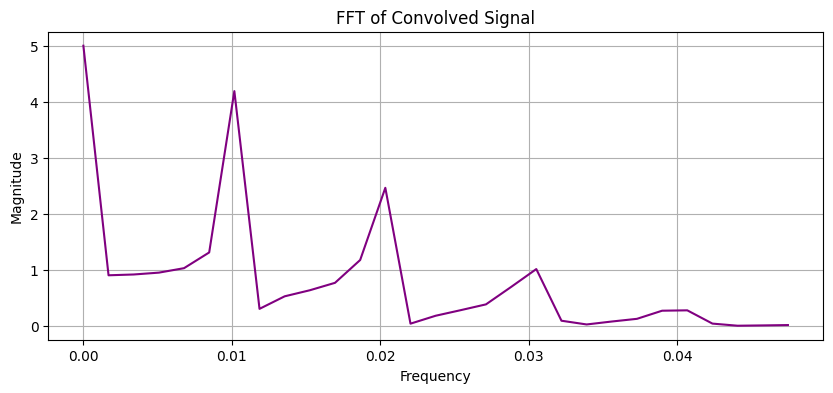

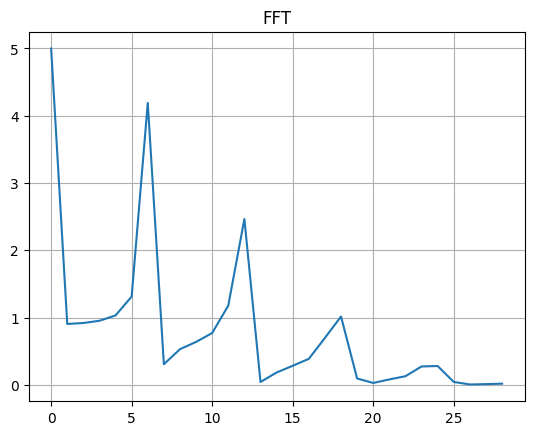

In [158]:
# FFT Parameters
signal = convolved_result  # or use noisy_result if you added noise
N = len(signal)
T = 10  # Sample spacing (change if you have a real sampling rate)

# Compute FFT
yf = fft(signal)
xf = fftfreq(N, T)[:N // 2]  # only positive frequencies since symmetric

# Plot
plt.figure(figsize=(10, 4))
plt.plot(xf, np.abs(yf[:N // 2]), color='purple')
plt.title("FFT of Convolved Signal")
plt.xlabel("Frequency")  # what freqs are present in the signal (peaks in FFT graph)
plt.ylabel("Magnitude")  # how strong those freqs are (height of peaks)
plt.grid(True)
plt.show()

plt.plot(np.abs(yf[:N // 2]))
plt.title("FFT")
plt.grid(True)
plt.show()


Parker Data

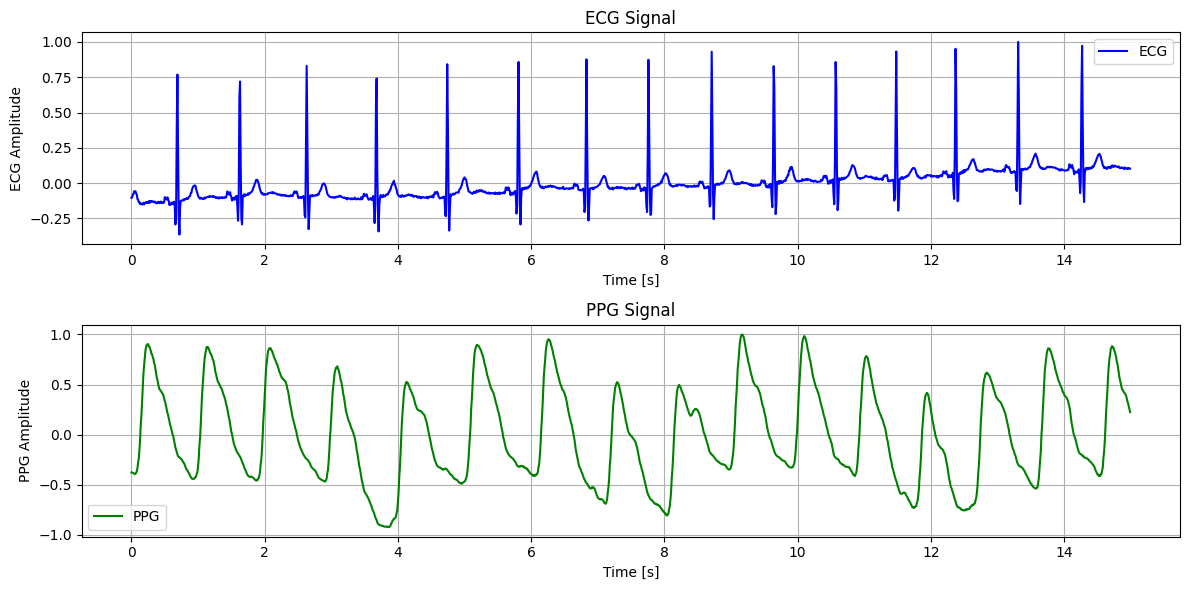

In [159]:
df = pd.read_csv('biosignals.csv')

# plot ECG and PPG with time
plt.figure(figsize=(12, 6))

# Plot ECG
plt.subplot(2, 1, 1)
plt.plot(df['t'], df['ecg'], label='ECG', color='b')
plt.title('ECG Signal')
plt.xlabel('Time [s]')
plt.ylabel('ECG Amplitude')
plt.grid(True)
plt.legend()

# Plot PPG
plt.subplot(2, 1, 2)
plt.plot(df['t'], df['ppg'], label='PPG', color='g')
plt.title('PPG Signal')
plt.xlabel('Time [s]')
plt.ylabel('PPG Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()

In [160]:

# we want to know when a spike happens (aka a heartbeat), so let's
# extract the spikes from the ecg data
threshold = np.percentile(df['ecg'], 99)  # we only want the highest amplitude ecg scores
binary_ecg = np.where(df['ecg'] > threshold, 1, 0)

#output_file = 'binary_ecg_output.txt'  # Specify your desired file name

# Write the binary_ecg values to the file, each on a new line
#with open(output_file, 'w') as file:
#    for value in binary_ecg:
#        file.write(f"{value}\n")


# PPG data is the output (y)
ppg = df['ppg'].values

# deconvolve to solve for h
h = deconvolve(ppg, binary_ecg)

# Plot the kernel h (Impulse Response)
plt.figure(figsize=(10, 5))
plt.plot(h, label='Solved Kernel (h)', color='r')
plt.title('Solved Kernel h (Convolution Impulse Response)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


ValueError: BUG: filter coefficient a[0] == 0 not supported yet

In [ ]:
heartbeat_times = np.array([0.69,  1.63,  2.63,  3.68,  4.74,  5.81,  6.83,  7.76,  8.71,  9.64, 10.57, 11.48, 12.37, 13.31, 14.27])
